<a href="https://colab.research.google.com/github/Andishafira/Tugas_PraktikumML-D_219-231/blob/annisa/TugasML_KelompokV3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TugasBesar_MachineLearning"

In [ ]:
%cd /content/drive/MyDrive/Modul Pembelajaran Mesin/Modul 4/TugasBesar_MachineLearning/chest_xray

/content/drive/.shortcut-targets-by-id/1nUFgh-fhYwQABlnrde4Sy8MztGqeCcA6/TugasBesar_MachineLearning/chest_xray


In [ ]:
!ls

chest_xray  __MACOSX  test  train  val


In [ ]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 90.8MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.3MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

#Preprocessing

In [ ]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, SpatialDropout2D
from keras.layers import GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import shutil
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
#Pengambilan Data
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

###Spliting Data

In [ ]:
!mkdir /content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/allData
!mkdir /content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/allData/NORMAL
!mkdir /content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/allData/PNEUMONIA


In [ ]:
#Inisialisasi Path
train_Normal = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/train/NORMAL'
train_Pneumonia = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/train/PNEUMONIA'
test_Normal = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/test/NORMAL'
test_Pneumonia = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/test/PNEUMONIA'
val_Normal = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/val/NORMAL'
val_Pneumonia = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/val/PNEUMONIA'
allData_Normal = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/allData/NORMAL'
allData_Pneumonia = '/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/allData/PNEUMONIA'

In [ ]:
filesTrainN = os.listdir(train_Normal)
filesTrainP = os.listdir(train_Pneumonia)
filesTestN = os.listdir(test_Normal)
filesTestP = os.listdir(test_Pneumonia)

In [ ]:
for file in filesTrainN:
  new_path = shutil.move(f"{train_Normal}/{file}",allData_Normal)

In [ ]:
for file in filesTestN:
  new_path = shutil.move(f"{test_Normal}/{file}",allData_Normal)

In [ ]:
for file in filesTrainP:
  new_path = shutil.move(f"{train_Pneumonia}/{file}",allData_Pneumonia)
for file in filesTestP:
  new_path = shutil.move(f"{test_Pneumonia}/{file}",allData_Pneumonia)

In [ ]:
!pip install split-folders

ini ceritanya folder train val test di folder "/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray" ini tak hapus dulu. habis itu baru keganti sama file baru hasil split 80,19,1 di path yang sama

In [ ]:
mainFolder="/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray"
dataFolder="/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/chest_xray/allData"

In [ ]:
import splitfolders
splitfolders.ratio(dataFolder, output=mainFolder, seed=1337, ratio=(.8,.19,.01),group_prefix=None)

Copying files: 5840 files [01:48, 53.71 files/s]


In [ ]:
train = get_training_data('/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/TugasBesar_MachineLearning/chest_xray/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


###Analisis Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


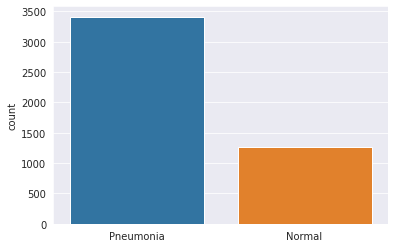

In [ ]:
#Analisis Data
cekData = []
for i in train:
    if(i[1] == 0):
        cekData.append("Pneumonia")
    else:
        cekData.append("Normal")
sns.set_style('darkgrid')
sns.countplot(cekData) 

Imbalance Dataset


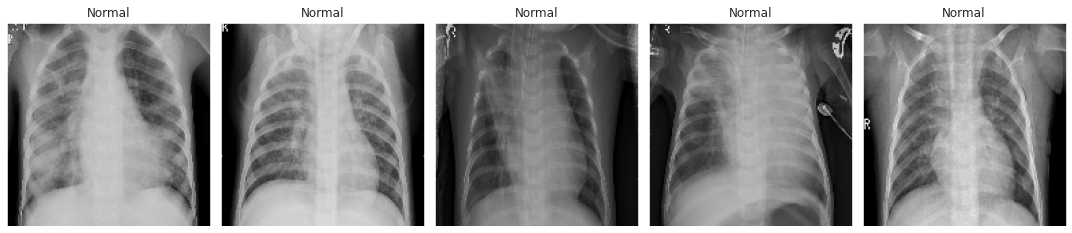

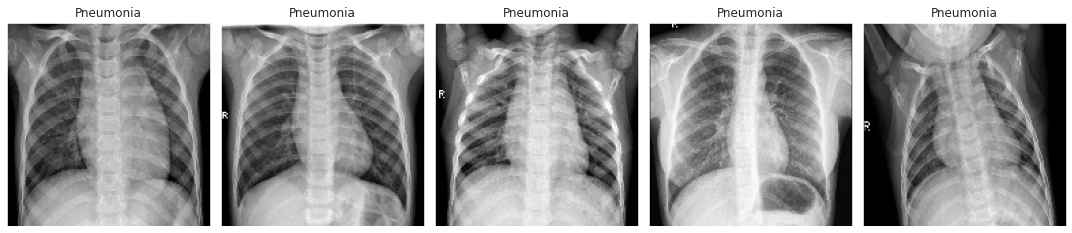

In [ ]:
#Print sampel data dari masing masing label
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
        img = train[i][0]
        ax.imshow(img, cmap='gray')
        ax.set_title("Normal")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
        img = train[-(i+1)][0]
        ax.imshow(img, cmap='gray')
        ax.set_title("Pneumonia")
fig.tight_layout()
plt.show()

# Augmentation & Normalization

Data Augmentation

Tujuan :
1. Menghindari overfitting
2. Handling unbalance dataset
3. Menghasilkan model yang konsisten

In [ ]:
#Splitting Data
#X = Fitur
#Y = Label
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
#Normalisasi Data
#Biar dalam rentang 0-1
x_train = np.array(x_train) / 255 #255 = nilai max
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
#Resize Data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
re_train = datagen.flow_from_directory('/content/drive/MyDrive/Modul Pembelajaran Mesin/Modul 4/TugasBesar_MachineLearning/chest_xray/train',
                                          target_size=(250, 250),
                                          batch_size=32,
                                          class_mode='binary',
                                          color_mode='grayscale',
                                          shuffle=False)
re_val = datagen.flow_from_directory('/content/drive/MyDrive/Modul Pembelajaran Mesin/Modul 4/TugasBesar_MachineLearning/chest_xray/val',
                                          target_size=(250, 250),
                                          batch_size=32,
                                          color_mode='grayscale',
                                          class_mode='binary',
                                          shuffle=False)
re_test = datagen.flow_from_directory('/content/drive/MyDrive/Modul Pembelajaran Mesin/Modul 4/TugasBesar_MachineLearning/chest_xray/test',
                                          target_size=(250, 250),
                                          batch_size=32,
                                          color_mode='grayscale',
                                          class_mode='binary',
                                          shuffle=False)

Found 4672 images belonging to 2 classes.
Found 1109 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

In [ ]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(y_train)

[0 0 0 ... 1 1 1]


# Modelling

## Modelling Scenario 1

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 1]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(GlobalMaxPooling2D())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 dropout (Dropout)           (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_1 = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

## Modelling Scenario 2

In [ ]:
mod = Sequential()

mod.add(InputLayer(input_shape=[150, 150, 1]))
mod.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
mod.add(Dropout(0.2))
mod.add(AveragePooling2D(pool_size=2, padding='same'))

mod.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
mod.add(Dropout(0.2))
mod.add(AveragePooling2D(pool_size=2, padding='same'))

mod.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
mod.add(Dropout(0.2))
mod.add(AveragePooling2D(pool_size=2, padding='same'))

mod.add(GlobalAveragePooling2D())
mod.add(Flatten())

mod.add(Dense(128, activation='relu'))
mod.add(Dense(1, activation='sigmoid'))

In [ ]:
print(mod.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      160       
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 150, 16)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 64)       

In [ ]:
mod.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_2 = mod.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
290/290 [==============================] - 8s 25ms/step - loss: 0.5837 - acc: 0.7283 - val_loss: 0.5359 - val_acc: 0.7368
Epoch 2/100
290/290 [==============================] - 7s 24ms/step - loss: 0.5108 - acc: 0.7296 - val_loss: 0.4496 - val_acc: 0.7368
Epoch 3/100
290/290 [==============================] - 7s 24ms/step - loss: 0.4916 - acc: 0.7301 - val_loss: 0.4296 - val_acc: 0.7368
Epoch 4/100
290/290 [==============================] - 7s 24ms/step - loss: 0.4768 - acc: 0.7370 - val_loss: 0.4192 - val_acc: 0.7368
Epoch 5/100
290/290 [==============================] - 7s 24ms/step - loss: 0.4578 - acc: 0.7643 - val_loss: 0.4012 - val_acc: 0.7544
Epoch 6/100
290/290 [==============================] - 7s 24ms/step - loss: 0.4324 - acc: 0.7901 - val_loss: 0.4000 - val_acc: 0.8246
Epoch 7/100
290/290 [==============================] - 7s 24ms/step - loss: 0.4114 - acc: 0.8129 - val_loss: 0.4319 - val_acc: 0.7368
Epoch 8/100
290/290 [==============================] - 7s 24ms

## Modelling Scenario 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.15))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Flatten())
model3.add(Dense(units = 128 , activation = 'relu'))
model3.add(Dropout(0.2))

model3.add(Dense(units = 1 , activation = 'sigmoid'))
model3.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
model_3 = model3.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/100
181/181 [==============================] - 51s 111ms/step - loss: 0.3486 - accuracy: 0.8701 - val_loss: 3.7820 - val_accuracy: 0.7308
Epoch 2/100
181/181 [==============================] - 19s 106ms/step - loss: 0.2261 - accuracy: 0.9132 - val_loss: 1.2116 - val_accuracy: 0.7308
Epoch 3/100
181/181 [==============================] - 19s 106ms/step - loss: 0.2037 - accuracy: 0.9231 - val_loss: 0.2440 - val_accuracy: 0.9115
Epoch 4/100
181/181 [==============================] - 19s 106ms/step - loss: 0.1871 - accuracy: 0.9334 - val_loss: 0.2716 - val_accuracy: 0.9015
Epoch 5/100
181/181 [==============================] - 19s 105ms/step - loss: 0.1707 - accuracy: 0.9364 - val_loss: 1.0657 - val_accuracy: 0.5985

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/100
181/181 [==============================] - 19s 105ms/step - loss: 0.1503 - accuracy: 0.9455 - val_loss: 1.8512 - val_accuracy: 0.7308
Epoch 7/100
181/181 [======================

In [ ]:
from sklearn.metrics import classification_report

pred = model3.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))


              precision    recall  f1-score   support

           0       0.99      0.90      0.94       801
           1       0.79      0.97      0.87       295

    accuracy                           0.92      1096
   macro avg       0.89      0.94      0.91      1096
weighted avg       0.93      0.92      0.92      1096



## Modelling Scenario 4

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model4.add(BatchNormalization())
model4.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(BatchNormalization())
model4.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(BatchNormalization())
model4.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model4.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.15))
model4.add(BatchNormalization())
model4.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model4.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(AveragePooling2D((2,2) , strides = 2 , padding = 'same'))

model4.add(Flatten())
model4.add(Dense(units = 128 , activation = 'relu'))
model4.add(Dropout(0.2))

model4.add(Dense(units = 1 , activation = 'sigmoid'))
model4.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
average_pooling2d (AveragePo (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
average_pooling2d_1 (Average (None, 38, 38, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
model_4 = model4.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 100 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/100
181/181 [==============================] - 21s 107ms/step - loss: 0.3138 - accuracy: 0.8720 - val_loss: 0.8075 - val_accuracy: 0.7308
Epoch 2/100
181/181 [==============================] - 19s 106ms/step - loss: 0.2535 - accuracy: 0.9009 - val_loss: 0.8095 - val_accuracy: 0.6797
Epoch 3/100
181/181 [==============================] - 19s 105ms/step - loss: 0.2224 - accuracy: 0.9144 - val_loss: 0.3772 - val_accuracy: 0.8130
Epoch 4/100
181/181 [==============================] - 19s 106ms/step - loss: 0.2050 - accuracy: 0.9236 - val_loss: 0.6397 - val_accuracy: 0.7609
Epoch 5/100
181/181 [==============================] - 19s 105ms/step - loss: 0.1996 - accuracy: 0.9196 - val_loss: 3.3493 - val_accuracy: 0.7308

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/100
181/181 [==============================] - 19s 106ms/step - loss: 0.1716 - accuracy: 0.9381 - val_loss: 0.7819 - val_accuracy: 0.6560
Epoch 7/100
181/181 [======================

In [ ]:
from sklearn.metrics import classification_report

pred = model4.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       801
           1       0.87      0.95      0.91       295

    accuracy                           0.95      1096
   macro avg       0.93      0.95      0.94      1096
weighted avg       0.95      0.95      0.95      1096



## Modelling Scenario 5

In [ ]:
model5 = Sequential()

model5.add(InputLayer(input_shape=[250, 250, 3]))
model5.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model5.add(SpatialDropout2D(rate=0.5))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=2, padding='same'))

model5.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model5.add(SpatialDropout2D(rate=0.5))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=2, padding='same'))

model5.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model5.add(SpatialDropout2D(rate=0.5))
model5.add(BatchNormalization())
model5.add(Flatten())

model5.add(Dense(512, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

print(model5.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 spatial_dropout2d (SpatialD  (None, 250, 250, 32)     0         
 ropout2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                        

In [ ]:
mod5_checkpoint = ModelCheckpoint('m5_checkpoint.h5', monitor='val_acc',
                             save_best_only=True, verbose=1)

In [ ]:
model5.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model_5 = model5.fit_generator(re_train, epochs=100,
                               validation_data=re_val,
                               validation_steps=4, verbose=1,
                               callbacks=mod5_checkpoint)                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
181/181 [==============================] - ETA: 0s - loss: 0.0000e+00 - acc: 0.2696
Epoch 00001: val_acc did not improve from 0.34375
181/181 [==============================] - 159s 879ms/step - loss: 0.0000e+00 - acc: 0.2696 - val_loss: 0.0000e+00 - val_acc: 0.2266
Epoch 2/100
181/181 [==============================] - ETA: 0s - loss: 0.0000e+00 - acc: 0.2703
Epoch 00002: val_acc did not improve from 0.34375
181/181 [==============================] - 158s 872ms/step - loss: 0.0000e+00 - acc: 0.2703 - val_loss: 0.0000e+00 - val_acc: 0.2109
Epoch 3/100
181/181 [==============================] - ETA: 0s - loss: 0.0000e+00 - acc: 0.2710
Epoch 00003: val_acc did not improve from 0.34375
181/181 [==============================] - 158s 873ms/step - loss: 0.0000e+00 - acc: 0.2710 - val_loss: 0.0000e+00 - val_acc: 0.2734
Epoch 4/100
181/181 [==============================] - ETA: 0s - loss: 0.0000e+00 - acc: 0.2715
Epoch 00004: val_acc did not improve from 0.34375
181/181 [========

## Modelling Scenario 6

In [ ]:
model6 = Sequential()

model6.add(InputLayer(input_shape=[250, 250, 1]))
model6.add(Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu'))
model6.add(MaxPool2D(pool_size=2, padding='same'))

model6.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
model6.add(MaxPool2D(pool_size=2, padding='same'))
model6.add(Dropout(0.2))
model6.add(BatchNormalization())
model6.add(Flatten())

model6.add(Dense(16, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'],
  )

his = model6.fit(re_train, validation_data=re_val, epochs=50)

Epoch 1/50
146/146 [==============================] - 3120s 21s/step - loss: 0.4713 - accuracy: 0.7793 - val_loss: 0.3098 - val_accuracy: 0.8548
Epoch 2/50
146/146 [==============================] - 94s 645ms/step - loss: 0.3260 - accuracy: 0.8594 - val_loss: 0.2598 - val_accuracy: 0.8873
Epoch 3/50
146/146 [==============================] - 92s 631ms/step - loss: 0.2801 - accuracy: 0.8966 - val_loss: 0.3139 - val_accuracy: 0.8287
Epoch 4/50
146/146 [==============================] - 94s 642ms/step - loss: 0.2704 - accuracy: 0.8936 - val_loss: 0.3172 - val_accuracy: 0.8314
Epoch 5/50
146/146 [==============================] - 95s 650ms/step - loss: 0.2228 - accuracy: 0.9204 - val_loss: 0.2719 - val_accuracy: 0.8909
Epoch 6/50
146/146 [==============================] - 94s 642ms/step - loss: 0.1990 - accuracy: 0.9324 - val_loss: 0.3031 - val_accuracy: 0.8602
Epoch 7/50
146/146 [==============================] - 95s 645ms/step - loss: 0.1934 - accuracy: 0.9319 - val_loss: 0.3508 - val_ac

In [ ]:
ypos = model6.predict(re_test)
ypredict = np.argmax(ypos, axis=1)
print(classification_report(re_test.classes, ypredict))

              precision    recall  f1-score   support

           0       0.27      1.00      0.43        16
           1       0.00      0.00      0.00        43

    accuracy                           0.27        59
   macro avg       0.14      0.50      0.21        59
weighted avg       0.07      0.27      0.12        59



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(re_test.classes, ypredict)

array([[16,  0],
       [43,  0]])

# Loss & Accuracy Plot

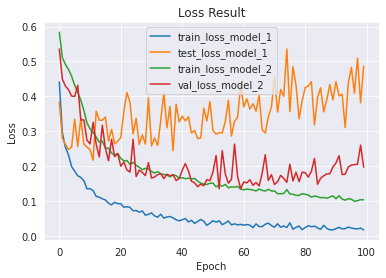

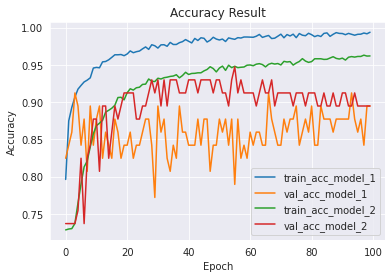

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_1.history["loss"], label="train_loss_model_1")
plt.plot(model_1.history["val_loss"], label="test_loss_model_1")
plt.plot(model_2.history["loss"], label="train_loss_model_2")
plt.plot(model_2.history["val_loss"], label="val_loss_model_2")
plt.title("Loss Result")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(model_1.history["acc"], label="train_acc_model_1")
plt.plot(model_1.history["val_acc"], label="val_acc_model_1")
plt.plot(model_2.history["acc"], label="train_acc_model_2")
plt.plot(model_2.history["val_acc"], label="val_acc_model_2")
plt.title("Accuracy Result")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

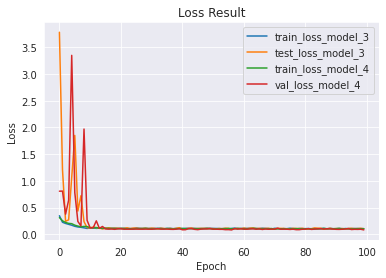

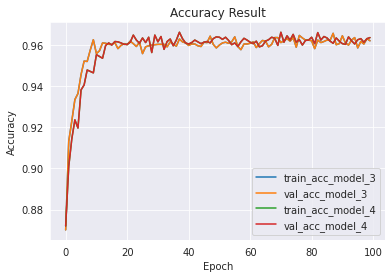

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_3.history["loss"], label="train_loss_model_3")
plt.plot(model_3.history["val_loss"], label="test_loss_model_3")
plt.plot(model_4.history["loss"], label="train_loss_model_4")
plt.plot(model_4.history["val_loss"], label="val_loss_model_4")
plt.title("Loss Result")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(model_3.history["accuracy"], label="train_acc_model_3")
plt.plot(model_3.history["val_accuracy"], label="val_acc_model_3")
plt.plot(model_4.history["accuracy"], label="train_acc_model_4")
plt.plot(model_4.history["val_accuracy"], label="val_acc_model_4")
plt.title("Accuracy Result")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

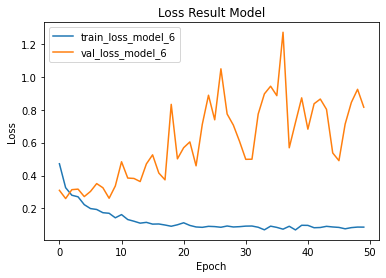

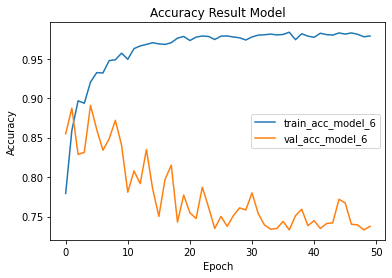

In [ ]:
#plt.plot(model_5.history["loss"], label="train_loss_model_5")
#plt.plot(model_5.history["val_loss"], label="val_loss_model_5")
plt.plot(his.history["loss"], label="train_loss_model_6")
plt.plot(his.history["val_loss"], label="val_loss_model_6")
plt.title("Loss Result Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

#plt.plot(model_5.history["acc"], label="train_acc_model")
#plt.plot(model_5.history["val_acc"], label="val_acc_model")
plt.plot(his.history["accuracy"], label="train_acc_model_6")
plt.plot(his.history["val_accuracy"], label="val_acc_model_6")
plt.title("Accuracy Result Model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Saving Model

In [ ]:
base_path = 'model'
project_name = 'all_models'
save_model = 'model_2.h5'
model_path = os.path.join(base_path, project_name, save_model)

if os.path.exists(os.path.join(base_path, project_name)) == False:
  os.makedirs(os.path.join(base_path, project_name))

mod.save(save_model, include_optimizer=False)
print('Model has been saved!')

Model has been saved!


In [ ]:
#model3.save_weights('model_3_weights.h5')
#model4.save_weights('model_4_weights.h5')
model5.save_weights('model_5_weights.h5')

In [ ]:
#model3.save('model_3.h5')
#model4.save('model_4.h5')
model5.save('model_5.h5')